In [1]:
import pandas as pd
from timeweaver import TimeWeaver
dataframe = pd.read_csv("../data/PRSA/PRSA_data_2010.1.1-2014.12.31.csv")
dataframe[0:1000]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2010,2,11,11,12.0,-22,-3.0,1037.0,NE,5.81,0,0
996,997,2010,2,11,12,12.0,-22,-3.0,1036.0,NE,11.62,0,0
997,998,2010,2,11,13,21.0,-24,-2.0,1036.0,NW,4.92,0,0
998,999,2010,2,11,14,18.0,-23,-2.0,1035.0,NE,4.02,0,0


<Axes: >

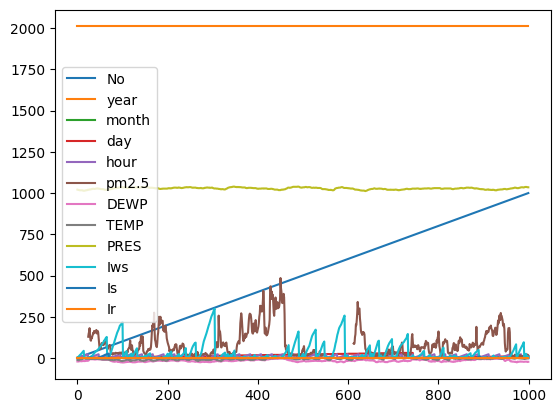

In [2]:
dataframe[0:1000].plot()

In [3]:
dataframe = dataframe[0:1000]
interpolator = TimeWeaver(dataframe, tracking_column="No")
interpolator.get_summary()

,Column,Data Type,Total Non-Numeric,Total Numeric,n,a,.,-,N,W,c,v,E,S
0,No,int64,0,2893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,year,int64,0,4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,month,int64,0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,day,int64,0,1568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hour,int64,0,1580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,pm2.5,float64,1182,2982,182.0,91.0,909.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,DEWP,int64,1000,1845,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0
7,TEMP,float64,1821,2246,0.0,0.0,1000.0,821.0,0.0,0.0,0.0,0.0,0.0,0.0
8,PRES,float64,1000,5000,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,cbwd,object,2000,0,0.0,0.0,0.0,0.0,690.0,528.0,155.0,155.0,317.0,155.0


In [4]:
# PRSA_data


dataframe = pd.read_csv("../data/PRSA/PRSA_data_2010.1.1-2014.12.31.csv")
dataframe = dataframe[0:1000]
interpolator = TimeWeaver(dataframe, tracking_column="No")
interpolator.evaluate()

results_df = interpolator.display_dataframe(style=True)
results_df

# results_ls = interpolator.display_list()
# results_ls

➤ Evaluating method: nearest ✔                                                  

c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:190: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(


➤ Evaluating method: Baum ✔                                                     
➤ Error with method Baum: method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']. Got 'Baum' instead. on column year ✔

➤ Error with method Baum: method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']. Got 'Baum' instead. on column month ✔

➤ Error with method Baum: method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']. Got 'Baum' instead. on column day ✔

➤ Error with 

c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:190: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(
c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:190: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(
c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:190: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(
c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:190: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_obj

➤ Evaluating method: piecewise_polynomial ✔                                     

c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:185: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(
c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:185: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(
c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:185: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(
c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:185: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_obj

➤ Evaluating method: spline ✔                                                   

c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:190: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(
c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:185: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(


➤ Evaluating method: spline ✔                                                   

c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:185: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(


➤ Evaluating method: spline ✔                                                   

c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:185: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(
c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:185: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(


➤ Evaluating method: from_derivatives ✔                                         

c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:185: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(
c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:190: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(
c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:190: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp_df[column] = temp_df[column].interpolate(
c:\users\cbg-rs\desktop\timeweaver\src\timeweaver.py:190: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_obj

➤ Evaluation complete. ✔                                                        
➤ Evaluated number of methods: 22 ✔


,linear,nearest,zero,slinear,quadratic,cubic,Baum,polynomial_order_1,polynomial_order_2,polynomial_order_3,polynomial_order_5,polynomial_order_7,polynomial_order_9,piecewise_polynomial,spline_order_1,spline_order_2,spline_order_3,spline_order_4,spline_order_5,akima,cubicspline,from_derivatives
year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month,0.000000,0.000000,0.000000,0.000000,0.000100,0.000300,-1.000000,0.000000,0.000100,0.000300,0.001600,0.004100,0.007600,0.000000,0.235000,0.147800,0.137200,0.115200,0.097100,0.000000,0.000300,0.000000
day,0.045000,0.070000,0.060000,0.045000,0.074100,0.086500,-1.000000,0.045000,0.074100,0.086500,0.156500,0.262900,0.396400,0.045000,0.382600,0.377700,0.421800,0.351500,0.355300,0.045000,0.086500,0.045000
hour,1.080000,2.540000,2.440000,1.080000,1.722700,1.897400,-1.000000,1.080000,1.722700,1.897400,2.653200,3.430900,4.244400,1.080000,1.407900,1.978000,1.751600,1.960000,2.524500,1.080000,1.897400,1.080000
pm2.5,9.038700,15.266700,14.400000,9.038700,10.119100,10.580600,-1.000000,9.038700,10.119100,10.580600,13.421800,18.319900,30.723800,9.038700,9.142600,9.942000,10.284200,12.324200,12.392900,8.926900,10.580600,9.038700
DEWP,0.678300,0.880000,0.860000,0.678300,0.784300,0.808100,-1.000000,0.678300,0.784300,0.808100,0.957400,1.101300,1.343300,0.678300,0.974600,0.907900,0.928100,0.851800,0.943200,0.713100,0.808100,0.678300
TEMP,0.720000,1.030000,1.170000,0.720000,0.851300,0.915100,-1.000000,0.720000,0.851300,0.915100,1.175200,1.416400,1.571000,0.720000,1.012600,1.036900,1.019800,1.129300,1.022000,0.709500,0.915100,0.720000
PRES,0.395000,0.550000,0.530000,0.395000,0.422700,0.441800,-1.000000,0.395000,0.422700,0.441800,0.534500,0.626500,0.734800,0.395000,0.933700,0.945600,0.837300,0.888200,0.882000,0.386500,0.441800,0.395000
cbwd,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Iws,2.972000,6.240900,5.646300,2.972000,4.337200,4.754100,-1.000000,2.972000,4.337200,4.754100,7.128600,10.803900,15.938900,2.972000,3.208200,4.191300,4.885500,5.705500,7.024900,2.909500,4.754100,2.972000


In [5]:
import pandas as pd
dataframe = pd.read_csv("../data/PRSA/PRSA_data_2010.1.1-2014.12.31.csv")
dataframe[0:1000]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2010,2,11,11,12.0,-22,-3.0,1037.0,NE,5.81,0,0
996,997,2010,2,11,12,12.0,-22,-3.0,1036.0,NE,11.62,0,0
997,998,2010,2,11,13,21.0,-24,-2.0,1036.0,NW,4.92,0,0
998,999,2010,2,11,14,18.0,-23,-2.0,1035.0,NE,4.02,0,0
